# Лр-8


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import permutations

## Задание 8.1 
Найти аналитическое и приближенное решения краевой задачи
$$\begin{cases} -u'' + pu' + qu=f(x),~x \in [a, b] \\ u(a) = U_a,~ u(b) = U_b  \end{cases} $$

с заданным шагом $h$. Решение системы разностных уравнений найти c помощью метода прогонки.

Варинт №11
$$\begin{cases} -u'' + 2u' + 15u = 60x^2-14x-12,~x \in (a, b) \\ u(1) = 2,~ u(3) = 30  \end{cases} $$

$$p = 2,~ q=15,~ f(x)=60x^2-14x-12 $$

### 1. Аналитическое решение задачи:
Исходное ДУ (дифференциальное уравнение) является линейным неоднородным ДУ, поэтому его общее решение имеет вид: $u = u_о + u_ч$, где $u_о$ - общее решение линейного однородного ДУ, а $u_ч$ - частное решение линейного однородного ДУ.

В нашем примере линейное однородное ДУ $-u'' + 2u' + 15u = 0 $ оказалось уравнением с постоянными коэффициентами, поэтому его можно решать с помощью характеристического уравнения: $-\lambda^2+2\lambda+15=0 $. 
Оно имеет лишь действительные корни кратности 1: $\lambda_1 = 5$ , $\lambda_2 = -3$, поэтому $u_о = C_1e^{5x}+C_2e^{-3x} $.


Частное решение неоднородного ДУ найдём методом неопределённых коэффициентов: поскольку правая часть $f(x) = 60x^2-14x-12 $ уравнения представляет собой многочлен второй степени, то решение можно искать также в виде многочлена второй степени с неизвестными (неопределёнными) коэффициентами: $u_ч = Ax^2+Bx+C $.

Подставиви его (вместо частного решения) в исходное уравнение, получим следующее  равенство:
$$ -u'' + 2u' + 15u = -2A+2*2Ax+2B+15Ax^2+15Bx+15C=f(x) $$
$$-2A+4Ax+2B+15Ax^2+15Bx+15C=60x^2-14x-12 $$
$$15Ax^2+(4A+15B)x+15C-2A+2B=60x^2-14x-12$$

из которого найдём неизвестные коэффициенты:
$$\begin{cases} 15A=60 \\ 4A+15B=-14 \\ 15C-2A+2B=-12   \end{cases} $$
$$ \begin{cases} A=4 \\ B=-2 \\ C=0   \end{cases} $$

Следовательно, $u_ч = 4x^2-2x $

Таким образом, общее решение ДУ имеет вид: $u = C_1e^{5x}+C_2e^{-3x} + 4x^2-2x $
Решение краевой задачи:
$$ u(1) = C_1e^{5}+C_2e^{-3} + 4-2 = 2, ~~ C_1e^{5}+C_2e^{-3} = 0 $$
$$u(3) = C_1e^{15}+C_2e^{-9} + 36-6 = 30, ~~ C_1e^{15}+C_2e^{-9} = 0 $$

Получили сис-му:
$$ \begin{cases} C_1e^{5}+C_2e^{-3} = 0 \\ C_1e^{15}+C_2e^{-9} = 0   \end{cases} $$

определитель сис-мы не равен 0, значит имеем только тривиальное решение:
$C_1 = C_2 = 0 $

Итого решение краевой задачи: $u = 4x^2-2x $

### 2. Cоставить разностную схему и выписать коэффициенты матрицы системы уравнений и коэффициенты правой части.

Все теоритические выкладки взяты из учебника(параграф 15.3)

Будем составлять разностную схему для такой задачи:
$$-u'' + pu' + qu = f(x) $$

Пусть, мы выбрали шаг h и у нас N отрезков разбиения

В исходной задаче заменим 1ю и 2ю производные на их конечные разностные аппроксимации. 

$$u(x)'' \approx \frac {u(x-h) - 2u(x)+u(x+h)}{h^2} $$

Для 1-ой производной выберем центральную разностную производную. Самое главное, чтобы выполнялось ограничение на h:

$$h|p| < 2min(k_{i-\frac{1}{2}}, k_{i+\frac{1}{2}}), $$

но у нас $k$ - коэффициент постоянный, поэтому, подставив $p$ получим

$$h ~ < ~ 1,$$ учтём это ограничение при  начальном  выборе $h$

Формула центральной разностной производной

$$u(x)' \approx \frac {u(x+h) - u(x-h)}{2h}  $$ 

В дальнейшем под $u(x),~u(x-h),~u(x+h)$ будем подразумевать $u_i,~u_{i-1},~u_{i+1} $

Подставим наши аппроксимации:

$$ -\frac {u_{i-1} - 2u_i+u_{i+1}}{h^2} + p(\frac {u_{i+1} - u_{i-1}}{2h}) + qu_i = f(x) $$

Домножим на $2h^2 $ и выделим подобные:

$$ -u_{i-1}(ph+2) + u_i2(2+qh^2)+u_{i+1}(ph-2) = 2h^2f_i $$

Окончательно получим сис-му (*):

$$u_0=2$$

$$-u_{i-1}(ph+2) + u_i2(2+qh^2)+u_{i+1}(ph-2) = 2h^2f_i,~ где 0 < i < N$$

$$u_N = 30 $$



Данная сис-ма - есть частный случай сис-мы алгебраических ур-ий вида:

$$\begin{cases} b_0u_0+c_0u_1=d_0 \\ a_iu_{i-1}+b_iu_i+c_iu_{i+1}=d_i, ~где 0 < i < N \\ a_Nu_{N-1}+b_Nu_N = d_N\end{cases} $$

Матрица которой трёхдиагональна

Для нашей сис-мы (*) 

$$ b_0 = 1, ~с_0 = 0, ~ d_0 = u_0 = 2$$
$$ a_i = -(2+ph), ~ b_i = 2(2+qh^2), ~ c_i=(ph-2), ~ d_i = 2h^2f_i$$
$$ a_N = 0, ~b_N = 1, ~d_N = 30 $$

Данная сис-ма будет вычисляться с помощью метода прогонки

Метод прогонки - алгоритм состоящий из 2-ух частей: вычисление прогоночных коэффициентов(прямой ход) и непосредственное вычисление зн-ий функции(обратный ход)

Прямой ход:
$$\alpha_0 = -\frac{c_0}{\gamma_0}; ~\beta_0 = \frac{d_0}{\gamma_0}; ~\gamma_0=b_0 $$

$$\alpha_i = -\frac{c_i}{\gamma_i}; ~\beta_i = \frac{(d_i-a_i\beta_{i-1})}{\gamma_i};~\gamma_i=b_i+a_i\alpha_{i-1}, ~где~ 0 < i < N $$

$$\beta_N = \frac{(d_N-a_N\beta_{N-1})}{\gamma_N} $$

$$\gamma_N = b_N+a_N\alpha_{N-1} $$

Обратный ход
$$u_N = U_b = 30 $$

$$u_i = \alpha_iu_{i+1}+\beta_i,~ где~ 0 < i < N$$

$$u_0 = U_a=2 $$

Применительно к сис-ме (*) формулы прямого хода упрощаются

$$\alpha_0 = 0;~ \beta_0 = U_a = d_0  $$

$$\alpha_i = -\frac{(ph-2)}{\gamma_i}; ~ \beta_i = \frac{(2h^2f_i+(2+ph)\beta_{i-1})}{\gamma_i} $$

$$\gamma_i = 2(2+qh^2)-(2+ph)\gamma_{i-1} $$

Касательно программы, реализуюзщей метод прогонки: программма разделена на 2 част: прямой ход и обратный. Т.к. и 2-ая задача тоже решается с помощью
        метода прогонки, то я сразу определил 2 функции прямого хода(для 1-ой и 2-ой задачи, соот-но). Подпрограмма обратного хода универсальная для обеих задач - она просто принимает на вход прогоночные коэффициенты. Для метода прогонки есть одна подпрограмма, в которой и вызываются подпрограммы прямого и обратного хода.

In [2]:
#Реализуем метод прогонки для задачи 1.3

#Прямой ход(вычисляем прогоночные коэфы)
def straight_step_1(start_point, f, x_i, h, p, q, N):
    alpha_prev = 0
    beta_prev = start_point
    lst = [(alpha_prev, beta_prev)]
    a_i = -1 * (2 + p * h)
    b_i = 2 * (2 + q * h ** 2)
    c_i = p * h - 2
    for i in range(1, N):
        x_i += h
        d_i = 2 * h ** 2 * f(x_i)
        gamma = b_i + a_i * alpha_prev
        alpha_cur = -c_i / gamma
        beta_cur = (d_i - a_i * beta_prev) / gamma
        lst.append((alpha_cur, beta_cur))
        alpha_prev, beta_prev = alpha_cur, beta_cur
    return lst

def straight_step_2(start_point, f, x_i, h, k, q, N):
    alpha_prev = 0
    beta_prev = start_point
    lst = [(alpha_prev, beta_prev)]
    for i in range(1, N):
        x_i += h
        a_i = -1 * k(x_i - h / 2)
        b_i = k(x_i - h / 2) + k(x_i + h / 2) + h ** 2 * q
        c_i = -1 * k(x_i + h / 2)
        d_i = h ** 2 * f(x_i)
        gamma = b_i + a_i * alpha_prev
        alpha_cur = -c_i / gamma
        beta_cur = (d_i - a_i * beta_prev) / gamma
        lst.append((alpha_cur, beta_cur))
        alpha_prev, beta_prev = alpha_cur, beta_cur
    return lst

def reverse_step(lst_alpha_beta, start_point, end_point, N):
    lst = [0] * (N + 1)
    lst[-1] = end_point
    lst[0] = start_point
    for i in range(N - 1, 0, -1):
        alpha_i, beta_i = lst_alpha_beta[i]
        lst[i] = alpha_i * lst[i + 1] + beta_i
    return lst

#Правая часть Д/У.
def f(x):
    return x ** 2 - 2 * x + 3


def tridiagonal_algorithm(start_point, end_point, f, x_start, h, k, p, q, N):
    if k == None:
        lst_coefs = straight_step_1(start_point, f, x_start, h, p, q, N)
    elif p == None:
        lst_coefs = straight_step_2(start_point, f, x_start, h, k, q, N)
    lst_points = reverse_step(lst_coefs, start_point, end_point, N)
    return np.array(lst_points)

In [3]:
def real_u(x):
    return -31.334*np.exp(-x) + 11.907 - 1/3*x**3 + 2*x**2 - 7*x

In [4]:
#Оценивать погрешность будем по правилу Рунге
def Runge(y_h, y_half_h, k):
    lst_erors = []
    for i in range(len(y_h)):
        lst_erors.append(np.abs(y_h[i] - y_half_h[2 * i]))
    return max(lst_erors) / (2 ** k - 1)

### 3. Найти решение задачи по разностной схеме с точностью 0.001.

In [5]:
a, b = 2, 4
u_0, u_N = -1, -6
eps = 0.001
#Написать, почему нельзя начинать с шага больше
N = 10
h = (b - a) / N
p, q = -1, 0
U_2h = tridiagonal_algorithm(u_0, u_N, f, a, 2 * h, None, p, q, N // 2)
U_h = tridiagonal_algorithm(u_0, u_N, f, a, h, None, p, q, N)
while(Runge(U_2h, U_h, 2) > eps):
    U_2h = U_h
    h /= 2
    N *= 2
    U_h = tridiagonal_algorithm(u_0, u_N, f, a, h, None, p, q, N)
print(U_h)

[-1.         -0.8969762  -0.83433561 -0.8104227  -0.82393007 -0.87386531
 -0.959521   -1.08044758 -1.23642877 -1.42745937 -1.65372515 -1.91558467
 -2.2135528  -2.54828587 -2.92056818 -3.33129979 -3.78148553 -4.27222501
 -4.80470359 -5.3801842  -6.        ]


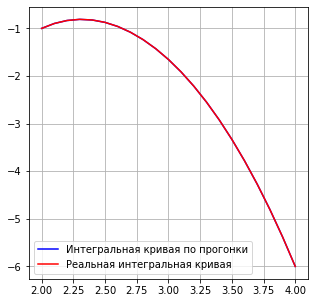

In [6]:
plt.figure(figsize=(5, 5))
points = np.linspace(a, b, N + 1)
plt.plot(points, U_h, color='blue', label='Интегральная кривая по прогонки')
plt.plot(points, real_u(points), color='red', label='Реальная интегральная кривая')
plt.legend()
plt.grid()

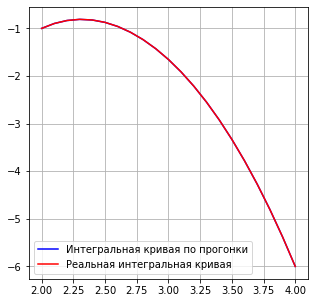

In [7]:
plt.figure(figsize=(5, 5))
points = np.linspace(a, b, N + 1)
plt.plot(points, U_h, color='blue', label='Интегральная кривая по прогонки')
plt.plot(points, real_u(points), color='red', label='Реальная интегральная кривая')
plt.legend()
plt.grid()

Интегральая кривая, полученаая по методу прогонки очень схожа с инетгральной кривой, полученной аналитически, но всё-таки разница есть(см. график погрешностей ниже)

### 4. Построить  на одном чертеже графики приближенного и аналитического решений, и график погрешности.

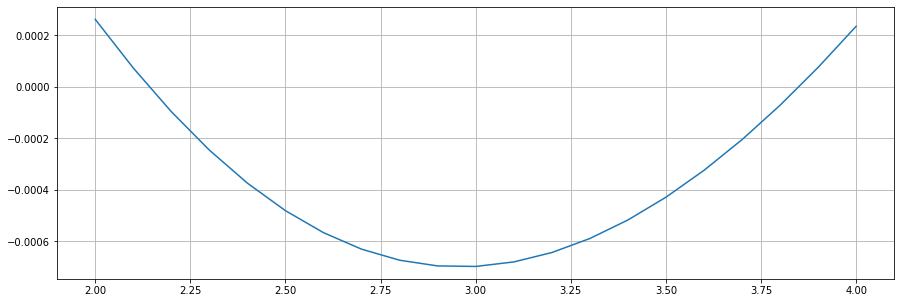

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.plot(points, U_h - real_u(points))
axs.grid()

## Задача 8.2
Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка x0 стержня имела максимальную температуру?

Математически задача формулируется следующим образом: найти приближенное решение краевой задачи

$$\begin{cases} -(k(x)u')' + q(x)=f(x),~x \in [a, b] \\ u(a) = U_a,~ u(b) = U_b  \end{cases}, ~ где~k(x) = \begin{cases} k_1(x),~ 0<= x <=1 \\ k_2(x),~ 1 < x <= 2 \\ k_3(x),~ 2 < x <= 3\end{cases} $$

при каждой конфигурации стержня. Значения $ q(x)$ и $f(x)$ взять из табл. 8.1

Сравнить полученные значения температуры в фиксированной точке в каждом варианте. Выбрать оптимальный результат.

Данная задача схожа с предыдущей задачей, единственное отличие - это непостоянный коэффициент $k $. Т.к. моя функция k имеет разрывы(конечное число разрывов на исходном отрезке), то воспользуемся методом баланса. Здесь я буду ссылаться на лекцию 10 - разностная схема взята оттуда


В результате приходим к разностоной схеме:

$$-\frac{1}{h}[k_{i+\frac{1}{2}}\frac{u_{i+1} - u_i}{h} - k_{i-\frac{1}{2}}\frac{u_{i} - u_{i-1}}{h}] + q_iu_i = f_i $$

Немного преобразуем(домножим на $h^2$ и приведём подобные):

$$ -k_{i-\frac{1}{2}}u_{i-1} + (k_{i+\frac{1}{2}} + k_{i-\frac{1}{2}} + h^2q_i)u_i+ (-k_{i+\frac{1}{2}})u_{i+1} = h^2f $$

Итого:
$$u_0 = U_a, ~ u_N = U_b $$

$$ -k_{i-\frac{1}{2}}u_{i-1} + (k_{i+\frac{1}{2}} + k_{i-\frac{1}{2}} + h^2q_i)u_i+ (-k_{i+\frac{1}{2}})u_{i+1} = h^2f $$

Далее, к этой схеме применяется метод прогонки, всё аналогично заданию 8.1

### 1. Составить  подпрограмму, вычисляющую функцию k из индивидуального варианта.

In [11]:
def k1(x):
    return 6-x


def k2(x):
    return np.sqrt(x+3)


def k3(x):
    return 16


#функция, которая по заданным перестановке funcs генерирует функцию k
#Перестановки генерируются с помощью модолуя Python itertools функции 
#permutations
def permutat_k(funcs):
    k1, k2, k3 = funcs
    def get_value(x):
        if x >= 0 and x <= 1:
            return k1(x)
        elif x <= 2:
            return k2(x)
        elif x <= 3:
            return k3(x)
    return get_value

### 2. Для каждого варианта конфигурации стержня произвести расчет по разностной схеме с шагом $h = \frac{b-a}{100} $
### 3. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня.

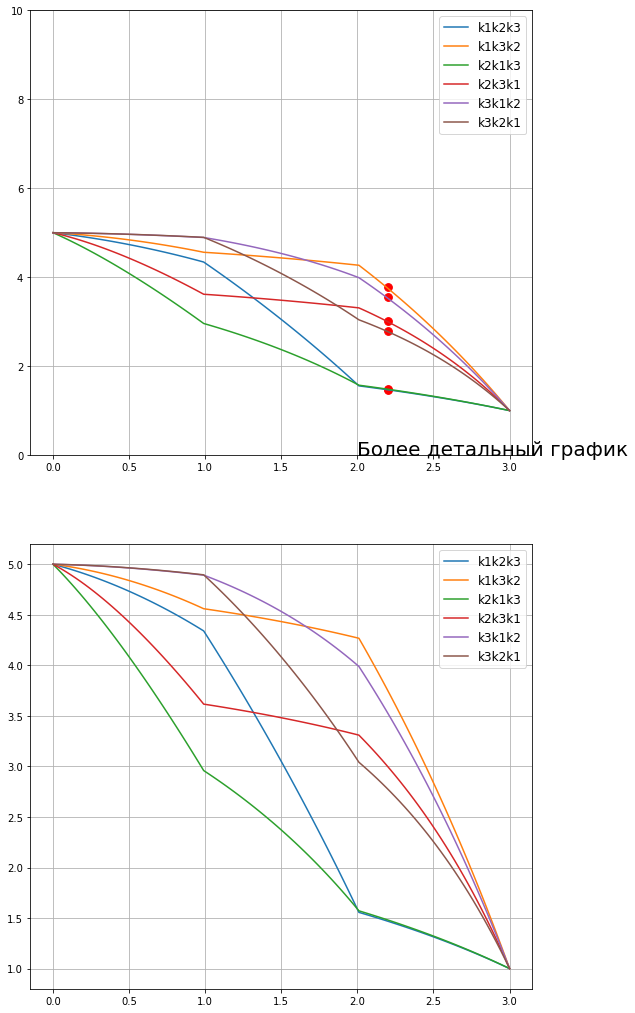

In [15]:
a, b = 0, 3
u_0, u_N = 5, 1
h = (b - a) / 100
N = 100
q = 0
x_0 = 2.2
#Создадим список с нашими функциями, которые будем переставлять
funcs = [k1, k2, k3]
fig, axs = plt.subplots(2, 1, figsize=(9, 18))
points = np.linspace(a, b, N + 1)
axs[0].set_ylim(0, 10)
#Производим расчёт по каждой конфигурации стержня
for item in permutations(funcs):
    label_func = ""
    for i in range(len(funcs)):
        label_func += item[i].__name__
    k = permutat_k(item)
    U_h = tridiagonal_algorithm(u_0, u_N, f, a, h, k, None, q, N)
    axs[0].plot(points, U_h, label=label_func)
    x_0_index = int((x_0 - a) / h)
    f_x_0 = U_h[x_0_index]
    axs[0].scatter(x_0, f_x_0, color='red', s=60, marker='o')
    axs[1].plot(points, U_h, label=label_func)
axs[0].grid()
axs[1].grid()
axs[0].text(2, 0, "Более детальный график", fontsize = 20)
axs[0].legend(prop={'size': 12})
axs[1].legend(prop={'size': 12})

### 3. Сравнив  полученные решения, выбрать оптимальный результат.

 Как видно из 1-ого графика(более детального графика)(зн-е в точке x_0 отмечено красно точкой) конфигурация k1k3k2 стержня - конфигурация, при которой зн-ие в точке x_0 = 0.3 температура(зн-ие функции) максимальна